In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [49]:
pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 8.7 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 4.0/4.0 MB 11.0 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     --------------------------------------- 14.7/14.7 MB 11.1 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 1.2/1.2 MB 11.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.
mysql-connector-python 8.0.32 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 4.22.1 which is incompatible.


In [5]:
train =pd.read_csv("D:\mnist\mnist_train.csv")
test=pd.read_csv("D:\mnist\mnist_test.csv")

In [6]:
train.shape

(60000, 785)

In [56]:
train.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [57]:
train_Y.head(10)

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: label, dtype: int64

In [7]:
train_Y=train.iloc[:,0]
train_X=train.drop(['label'],axis=1)

test_Y=test.iloc[:,0]
test_X=test.drop(['label'],axis=1)

In [8]:
train_X.shape

(60000, 784)

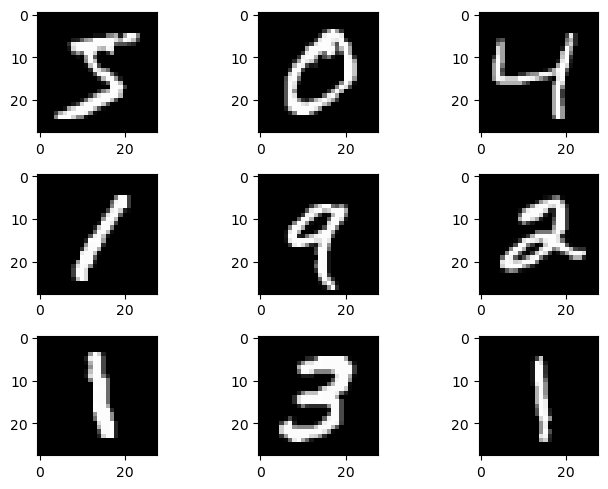

In [36]:
plt.rcParams["figure.figsize"] = [7,5]
plt.rcParams["figure.autolayout"] = True
for i in range (9):
    plt.subplot(3,3,i+1)
    digit = train_X.iloc[i, 0:]
    digit = digit.values.reshape(28,28)
    plt.imshow(digit, cmap='gray')
    

In [60]:
for i in range (9):
    print(train_Y[i])

5
0
4
1
9
2
1
3
1


In [16]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
train_X.iloc[0].dtype

dtype('int64')

C:\Users\Taru Arora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

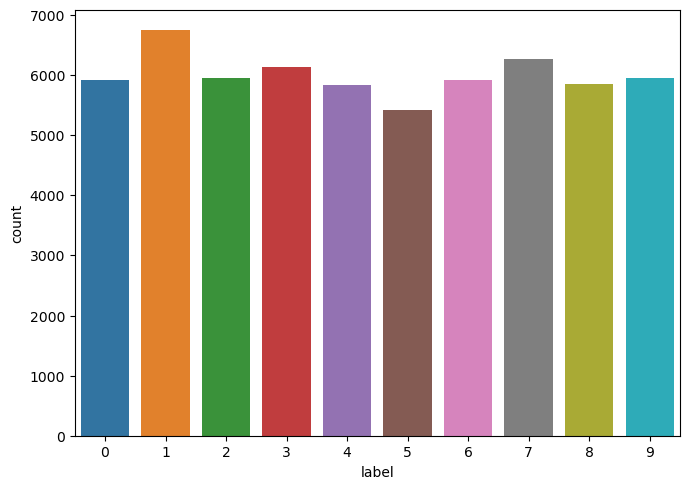

In [34]:
#displating the count of values
import seaborn as sns
sns.countplot(train_Y)


In [67]:
train_X_2d = train_X.values.reshape(-1, 28, 28)

In [87]:
#displaying digit from train_X

def plot_digit(digit, dem = 28, font_size = 12):
    max_ax = font_size * dem #size of each pixel(text) * no. of pixels
    
    fig = plt.figure(figsize=(8,8))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000' 
    
    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)#x,y,text
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c,c,c), alpha = 0.5, edgecolor = 'black'))
            
    plt.show()
    
#max_Ax-jdx* font size is done because in matplotlib the bottom left corner is set as 0

9


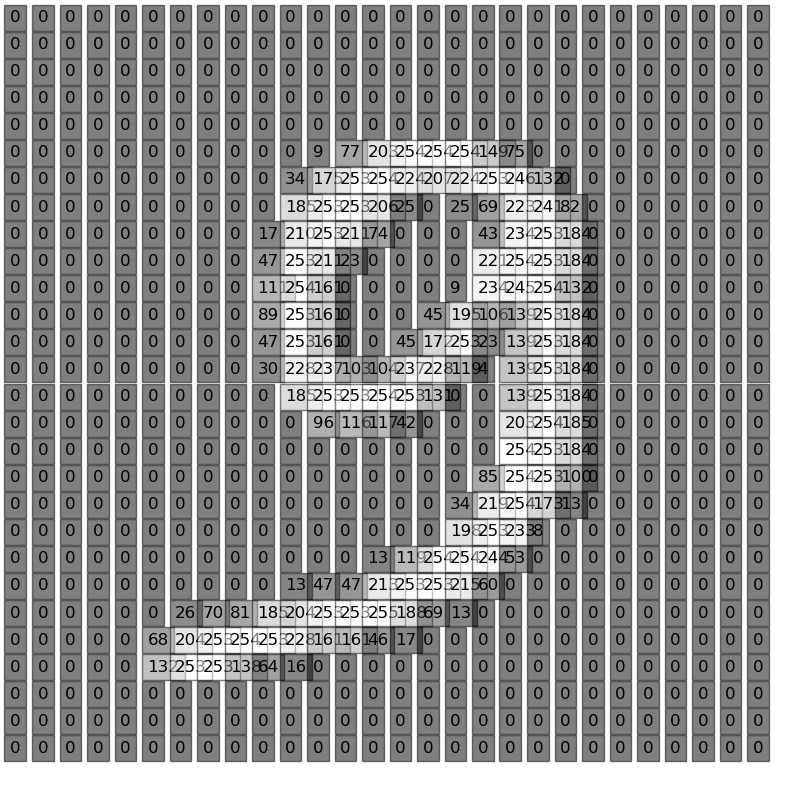

In [88]:
import random
rand_number = random.randint(0, len(train_Y))
print(train_Y[rand_number])
plot_digit(train_X_2d[rand_number])

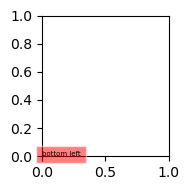

In [93]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(2,2))
t = plt.text(0, 0, "bottom left",fontsize=5)
plt.setp(t, bbox={"facecolor": "red", "edgecolor": "white", "alpha": 0.5})

plt.show()

In [10]:
# Data Normalization [0, 1]
train_X = train_X /255
test_X = test_X / 255


In [11]:
# one-hot encoding for target column
from tensorflow.keras.utils import to_categorical
train_Y_cat = to_categorical(train_Y)
print(train_Y[2])
print(train_Y_cat[2])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(train_X,train_Y,train_size=0.85,random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((51000, 784), (9000, 784), (51000,), (9000,))

In [13]:
#with no hidden layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax') #softmax coz multiclass -> input-> 1d array
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.fit(X1_train,y1_train,epochs=5)

Epoch 1/5
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5005 - accuracy: 0.8699
Epoch 2/5
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.9128
Epoch 3/5
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2886 - accuracy: 0.9193
Epoch 4/5
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.9235
Epoch 5/5
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2701 - accuracy: 0.9254


In [14]:
score=model.evaluate(X1_test,y1_test)

282/282 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.9229


In [15]:
print(type(score))
print(len(score))
score

<class 'list'>
2


[0.2743469774723053, 0.9228888750076294]

In [16]:
print('Test loss: {}%'.format(score[0] * 100))
print('Test score: {}%'.format(score[1] * 100))

print("MLP Error: %.2f%%" % (100 - score[1] * 100))

Test loss: 27.43469774723053%
Test score: 92.28888750076294%
MLP Error: 7.71%


In [20]:
model2 = keras.Sequential([
    keras.layers.Dense(512, input_shape=(784,), activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') #softmax coz multiclass -> input-> 1d array
])


model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model2.fit(X1_train,y1_train,epochs=5)

Epoch 1/5
1594/1594 [==============================] - 16s 10ms/step - loss: 0.2096 - accuracy: 0.9362
Epoch 2/5
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0936 - accuracy: 0.9710
Epoch 3/5
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0644 - accuracy: 0.9797
Epoch 4/5
1594/1594 [==============================] - 17s 11ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 5/5
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0405 - accuracy: 0.9869


In [21]:
score=model.evaluate(X1_test,y1_test)

282/282 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.9229


In [ ]:
#this shows the model might overfight coz of more hidden layers

In [22]:
model2 = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #softmax coz multiclass -> input-> 1d array
])


model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model2.fit(X1_train,y1_train,epochs=5)

Epoch 1/5
1594/1594 [==============================] - 14s 8ms/step - loss: 0.2109 - accuracy: 0.9368
Epoch 2/5
1594/1594 [==============================] - 12s 8ms/step - loss: 0.0860 - accuracy: 0.9737
Epoch 3/5
1594/1594 [==============================] - 12s 7ms/step - loss: 0.0575 - accuracy: 0.9817
Epoch 4/5
1594/1594 [==============================] - 12s 8ms/step - loss: 0.0435 - accuracy: 0.9856
Epoch 5/5
1594/1594 [==============================] - 12s 8ms/step - loss: 0.0329 - accuracy: 0.9894


In [25]:
score=model2.evaluate(X1_test,y1_test)

282/282 [==============================] - 1s 4ms/step - loss: 0.0751 - accuracy: 0.9792


In [24]:
model3 = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #softmax coz multiclass -> input-> 1d array
])


model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model3.fit(X1_train,y1_train,epochs=5)

Epoch 1/5
1594/1594 [==============================] - 13s 8ms/step - loss: 0.2262 - accuracy: 0.9337
Epoch 2/5
1594/1594 [==============================] - 12s 7ms/step - loss: 0.0904 - accuracy: 0.9723
Epoch 3/5
1594/1594 [==============================] - 12s 7ms/step - loss: 0.0602 - accuracy: 0.9818
Epoch 4/5
1594/1594 [==============================] - 12s 8ms/step - loss: 0.0424 - accuracy: 0.9870
Epoch 5/5
1594/1594 [==============================] - 12s 8ms/step - loss: 0.0298 - accuracy: 0.9905


In [26]:
score=model3.evaluate(X1_test,y1_test)

282/282 [==============================] - 1s 3ms/step - loss: 0.0789 - accuracy: 0.9762


In [ ]:
#considering model2

In [27]:
y_predict=model2.predict(X1_test)

282/282 [==============================] - 6s 5ms/step


In [28]:
y_predict[1]

array([4.1339059e-17, 2.1350411e-11, 5.1011213e-13, 1.0000000e+00,
       8.7483502e-15, 8.3083194e-09, 2.3292972e-21, 1.6593198e-13,
       1.0526830e-11, 4.5524704e-09], dtype=float32)

In [29]:
np.argmax(y_predict[1])

3

In [33]:
y1_test.iloc[1]

3

In [34]:
arr=[np.argmax(i) for i in y_predict]
arr[:10]

[7, 3, 8, 9, 3, 9, 7, 7, 5, 4]

In [35]:
y1_test[:10]

12628    7
37730    3
39991    8
8525     9
8279     3
51012    9
14871    7
15127    7
9366     5
33322    4
Name: label, dtype: int64

In [36]:
X1_train.shape[0]

51000

In [39]:
xCon_train = X1_train.values.reshape(X1_train.shape[0], 28, 28, 1)
xCon_test = X1_test.values.reshape(X1_test.shape[0], 28, 28, 1)

# Define the model architecture
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model4.fit(xCon_train, y1_train, epochs=5)

Epoch 1/5
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1636 - accuracy: 0.9514
Epoch 2/5
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0540 - accuracy: 0.9837
Epoch 3/5
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0341 - accuracy: 0.9896
Epoch 4/5
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 5/5
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0164 - accuracy: 0.9946


In [41]:
xCon_test= X1_test.values.reshape(X1_test.shape[0], 28, 28, 1)
score=model4.evaluate(xCon_test,y1_test)

282/282 [==============================] - 2s 5ms/step - loss: 0.0451 - accuracy: 0.9870
